In [328]:
# Necessary packages are imported.

# Importing pandas library to work with the datasets.
import json
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns
import plotly.io as pio
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
pio.renderers.default = "browser"

<h2>1. Read excel file of medical data.<h2>

In [5]:
# read by default 1st sheet of an excel file
dataframe1 = pd.read_excel('Data with Areas - 1 11 2021 Excl Benign and Blank Area.xlsx')
 
print(dataframe1)

      Index file No       incidence date   age sex      adress  \
0         1    42/06  2006-01-25 00:00:00   64   F    Az Zahra   
1         2    68/06  2006-04-02 00:00:00   80   F  Al Ajaylat   
2         3    81/06  2006-08-02 00:00:00   73   M  Al Ajaylat   
3         4    90/06  2006-11-02 00:00:00   50   F  Az Zawiyah   
4         5    92/06  2006-12-02 00:00:00   40   F    Sabratah   
...     ...      ...                  ...  ...  ..         ...   
3217   3449      NaN                  NaN   72   F      Zlitan   
3218   3450      NaN                  NaN   71   F      Zlitan   
3219   3451      NaN                  NaN   71   M      Zlitan   
3220   3452      NaN                  NaN   90   F      Zlitan   
3221   3453      NaN                  NaN   49   F      Zlitan   

            primary site  icd-o-3           primary histology   Icd-o-3   \
0       Transverse colon     C18.4         adenocarcinoma, NOS  M8140      
1             Rectum, NOS    C20.9  Intestinal adenocar

<h2>2. Convert excel file of medical data into a CSV file.<h2>

In [11]:
# Code for converting excel file into csv file format.
#dataframe1.to_csv ("MedicalData1.csv",  index = None,  header=True) 
    
# read csv file and convert into a dataframe object 
MedicalData = pd.DataFrame(pd.read_csv("MedicalData1.csv", index_col=0)) 
  
# show the dataframe 
MedicalData

,file No,incidence date,age,sex,adress,primary site,icd-o-3,primary histology,Icd-o-3,behavior,grade,final diagnosis,Data sources,Region,Area,Aunicipality
Index,,,,,,,,,,,,,,,,
1,42/06,2006-01-25 00:00:00,64,F,Az Zahra,Transverse colon,C18.4,"adenocarcinoma, NOS",M8140,3,1,Ca Colon,Sabratha,Tripoli,Coast,Ajfarah
2,68/06,2006-04-02 00:00:00,80,F,Al Ajaylat,"Rectum, NOS",C20.9,Intestinal adenocarcinoma,M8144,3,1,Ca Rectum,Sabratha,Tripoli,Coast,Surman
3,81/06,2006-08-02 00:00:00,73,M,Al Ajaylat,"Rectum, NOS",C20.9,Intestinal adenocarcinoma,M8144,3,1,Ca Colon,Sabratha,Tripoli,Coast,Surman
4,90/06,2006-11-02 00:00:00,50,F,Az Zawiyah,Ascending colon,C18.2,Intestinal adenocarcinoma,M8144,3,2,Ca Colon,Sabratha,Tripoli,Coast,Az Zawiyah
5,92/06,2006-12-02 00:00:00,40,F,Sabratah,"Colon, NOS",C18.9,Mucinous adenocarcinoma,M8480,3,3,Ca Colon,Sabratha,Tripoli,Coast,Surman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,NaN,NaN,72,F,Zlitan,Sigmoid colon,C18.7,"adenocarcinoma, NOS",M8140,3,1,Ca Colon,Misurata,Tripoli,Coast,Al Khums
3450,NaN,NaN,71,F,Zlitan,Sigmoid colon,C18.7,"adenocarcinoma, NOS",M8140,3,1,Ca Colon,Misurata,Tripoli,Coast,Al Khums
3451,NaN,NaN,71,M,Zlitan,Sigmoid colon,C18.7,"adenocarcinoma, NOS",M8140,3,1,Ca Colon,Misurata,Tripoli,Coast,Al Khums


In [12]:
# Show description of MedicalData dataframe.

MedicalData.describe()

,age,behavior,grade
count,3222.000000,3222.000000,3222.000000
mean,57.198945,2.998759,1.491620
std,14.494263,0.055705,0.696662
min,8.000000,0.000000,1.000000
25%,47.000000,3.000000,1.000000
50%,57.000000,3.000000,1.000000
75%,68.000000,3.000000,2.000000
max,99.000000,3.000000,4.000000


In [13]:
# Show the data types of all the columns in the MedicalData dataframe.

MedicalData.dtypes

file No               object
incidence date        object
age                    int64
sex                   object
adress                object
primary site          object
icd-o-3               object
primary histology     object
Icd-o-3               object
behavior               int64
grade                  int64
final diagnosis       object
Data sources          object
Region                object
Area                  object
Aunicipality          object
dtype: object

In [141]:
# Create a new column named ['incidence year'] to only take the year from the ['incidence date '] column.

MedicalData['incidence year'] = MedicalData['incidence date '].str.replace(r'-.+-.+', '', regex=True)
MedicalData['incidence year'] = MedicalData['incidence year'].str.replace(r'.+/.+/', '', regex=True)
MedicalData['incidence year'] = MedicalData['incidence year'].str.replace(r'.+/', '', regex=True)
MedicalData['incidence year'] = MedicalData['incidence year'].str.replace('.', '')
MedicalData['incidence year'] = MedicalData['incidence year'].replace(to_replace= r'\\', value= '', regex=True)

In [142]:
# 1. The first line of code referes to leaving only the last four string values in each cell, which refers to the year of diagnosis.
# For example, the date 12032018 would result in only 2018.
MedicalData['incidence year'] = MedicalData['incidence year'].str[-4:]

# 2. Replace all the NaN (not a number) values to 0.
MedicalData['incidence year'] = MedicalData['incidence year'].fillna(0)

# 3. Lastly, convert the column from type string (str) to numberic (int). 
MedicalData['incidence year'] = MedicalData['incidence year'].astype(int)

In [144]:
# Show the data type of the column [''incidence year'].

MedicalData['incidence year'].dtypes

dtype('int64')

In [200]:
# Clean sex data from duplication.
# Create a new column 'Sex' which holds only two values [Male, Female].

vals_to_replace = {'F  ':'Female', 'F ':'Female', 'f':'Female', 'f ':'Female', ' f':'Female', ' F':'Female', 'F':'Female','M ':'Male','m':'Male', 'M':'Male'}
MedicalData['Sex'] = MedicalData['sex'].map(vals_to_replace)

In [300]:
print("Number of values in 'age' column is : ", MedicalData['age'].value_counts().sum())

Number of values in 'age' column is :  3222


In [184]:
# Sorting age into age group categories.

bins= [0,27,40,56,71,85, 110]
labels = ['<= 26','27 - 39','40 - 55','56 - 70','71 - 84', '>= 85']
MedicalData['age group'] = pd.cut(MedicalData['age'], bins=bins, labels=labels, right=False)

In [231]:
# Clean 'final diagnosis ' column from duplicate values.
# Create new column 'Final Diagnosis' to hold only three values [].

vals_to_replace2 = {'Ca Colon ':' Ca Colon ', 'Ca Colon':' Ca Colon ', 'CA  Colon':' Ca Colon ', 'CA Colon':' Ca Colon ', 'Ca  Colon':' Ca Colon ', 'Ca colon':' Ca Colon ', ' Ca Colon':' Ca Colon ', 'Ca Colon  ':' Ca Colon ', 'Ca Rectum':' Ca Rectum ','Ca Rectum ':' Ca Rectum ', 'Ca Rectum  ':' Ca Rectum ', 'Ca Rectum       ':' Ca Rectum ', 'CA  Rectum':' Ca Rectum ', 'CA Rectum':' Ca Rectum ', 'Ca  Rectum':' Ca Rectum ', 'Ca rectum':' Ca Rectum ', 'Ca rectum ':' Ca Rectum ', 'CA  Rectum  ':' Ca Rectum ', 'Ca Sigmoid ':' Ca Sigmoid ' }
MedicalData['Final Diagnosis'] = MedicalData['final diagnosis '].map(vals_to_replace2)

In [236]:
print(MedicalData['Final Diagnosis'].value_counts())
print("Sum of all diagnosis is : ", MedicalData['Final Diagnosis'].value_counts().sum())

Final Diagnosis
 Ca Colon       2372
 Ca Rectum       849
 Ca Sigmoid        1
Name: count, dtype: int64
Sum of all diagnosis is :  3222


In [105]:
# Set pandas to display all the rows of the MedicalData dataframe.

pd.set_option('display.max_rows', None)

In [148]:
print(MedicalData['incidence year'].nunique())
print(MedicalData['incidence year'].count())
print(MedicalData['incidence date '].count())
print(MedicalData['incidence year'].value_counts())

21
3222
2243
incidence year
0       979
2020    204
2009    187
2016    186
2019    183
2015    178
2018    169
2013    169
2017    164
2010    161
2012    145
2014    116
2008    116
2006     90
2007     83
2011     82
2005      5
2004      2
1992      1
1999      1
90        1
Name: count, dtype: int64


<Axes: xlabel='incidence year'>

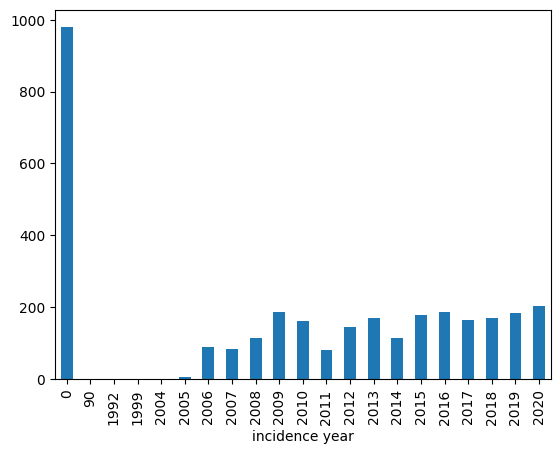

In [172]:
MedicalData['incidence year'].sort_values().value_counts(sort=False).plot(kind='bar')

3


<Axes: xlabel='Final Diagnosis'>

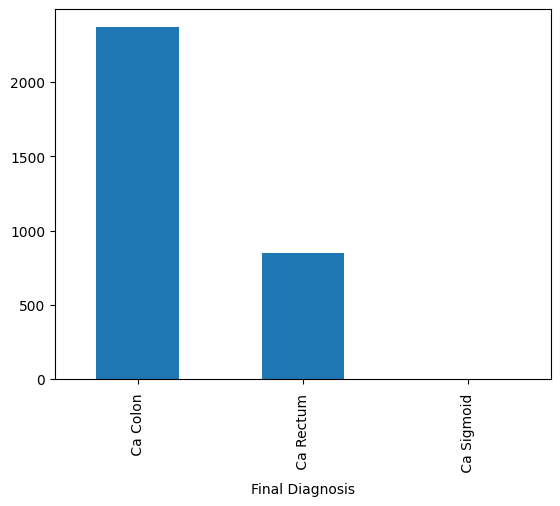

In [237]:
print(MedicalData['Final Diagnosis'].nunique())
MedicalData['Final Diagnosis'].value_counts().plot(kind='bar')

<Axes: xlabel='Final Diagnosis'>

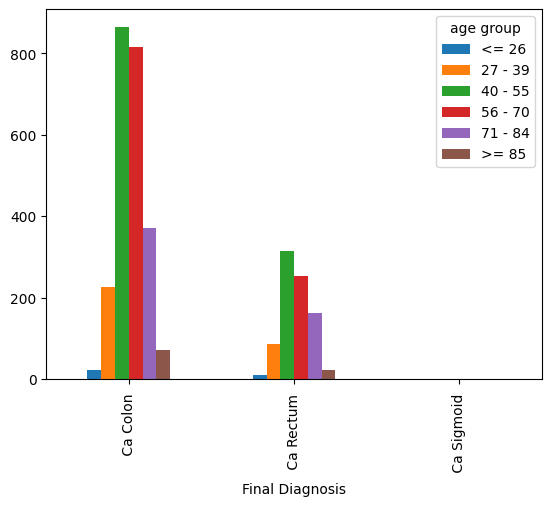

In [249]:
pd.crosstab(MedicalData['Final Diagnosis'],MedicalData['age group']).plot.bar()

In [268]:
# Create new columns, one column 'Male' and the other 'Female'

vals_to_replace3 = {'Male':1, 'Female':0}
vals_to_replace4 = {'Male':0, 'Female':1}
MedicalData['Male']=MedicalData['Sex'].map(vals_to_replace3)
MedicalData['Female']=MedicalData['Sex'].map(vals_to_replace4)

<Axes: xlabel='age_group'>

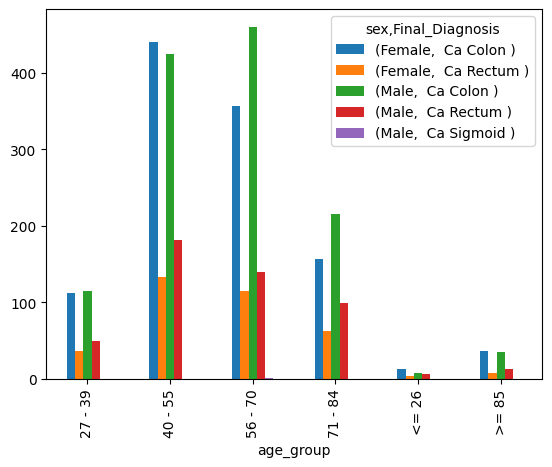

In [352]:
# Show bar chart of male and female final diagnosis basd on age group.

age_group = np.array(MedicalData['age group'], dtype=object)
sex = np.array(MedicalData['Sex'], dtype=object)
Final_Diagnosis = np.array(MedicalData['Final Diagnosis'], dtype=object)

pd.crosstab(age_group,[sex, Final_Diagnosis], rownames=['age_group'], colnames=['sex', 'Final_Diagnosis']).plot.bar()

In [284]:

pd.crosstab(age_group,[sex, Final_Diagnosis], rownames=['age_group'], colnames=['sex', 'Final_Diagnosis'])

sex                 Female                   Male                         
Final_Diagnosis  Ca Colon   Ca Rectum   Ca Colon   Ca Rectum   Ca Sigmoid 
age_group                                                                 
27 - 39                112          37        115          50            0
40 - 55                440         133        425         182            0
56 - 70                356         115        460         139            1
71 - 84                156          63        216          99            0
<= 26                   13           4          8           6            0
>= 85                   36           8         35          13            0

<Axes: xlabel='Final Diagnosis'>

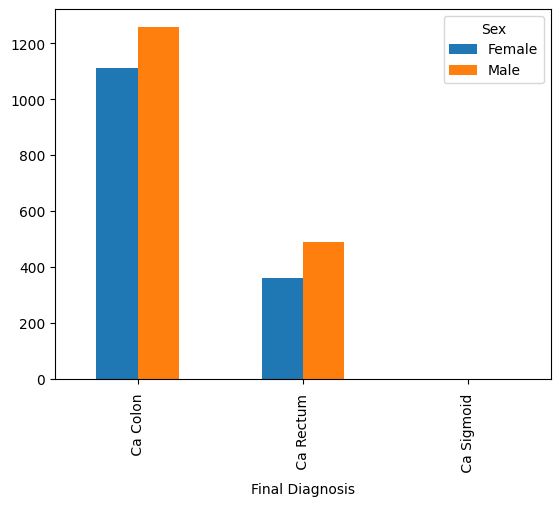

In [245]:
pd.crosstab(MedicalData['Final Diagnosis'],MedicalData['Sex']).plot.bar()

In [303]:
print(MedicalData['Icd-o-3 '].nunique()) # should be 16
print(MedicalData['Icd-o-3 '].value_counts())
MedicalData['Icd-o-3 '].value_counts().sum()


19
Icd-o-3 
M8140       1422
M8140        856
M8144        444
M8480        250
M8144         93
M8140         55
M8480         24
M8261         18
M8240         15
M8210         14
M8720          7
M8020          6
M8210          6
M8020          4
M8070          2
M8220          2
M8010          2
M8490          1
M8936          1
Name: count, dtype: int64


3222

In [320]:
# Clean 'final diagnosis ' column from duplicate values.
# Create new column 'Final Diagnosis' to hold only three values [].

vals_to_replace6 = {'C18.0':' Ca Colon ', 'C18.0 ':' Ca Colon ', 'C18.1':' Ca Colon ', 'C18.2':' Ca Colon ', 'C18.2 ':' Ca Colon ', 'C18.3':' Ca Colon ', 'C18.4':' Ca Colon ', 'C18.4 ':' Ca Colon ', 'C18.5':' Ca Colon ', 'C18.6':' Ca Colon ', 'C18.6 ':' Ca Colon ', 'C18.7':' Ca Colon ', 'C18.7 ':' Ca Colon ', 'C18.8':' Ca Colon ', 'C18.9':' Ca Colon ', 'C20.9 ':' Ca Rectum ', 'C20.9':' Ca Rectum ', 'C21.0':' Ca Rectum ', 'C21.1':' Ca Rectum ', 'C21.2':' Ca Rectum ', 'C21.8':' Ca Rectum ', 'C19.9':' Ca Sigmoid ', 'C19.9 ':' Ca Sigmoid ', 'C19.9  ':' Ca Sigmoid ' }
MedicalData[' Final Diagnosis '] = MedicalData['icd-o-3 '].map(vals_to_replace6)


In [321]:
MedicalData[' Final Diagnosis '].value_counts()

 Final Diagnosis 
 Ca Colon       2096
 Ca Rectum       850
 Ca Sigmoid      276
Name: count, dtype: int64

<Axes: xlabel=' Final Diagnosis '>

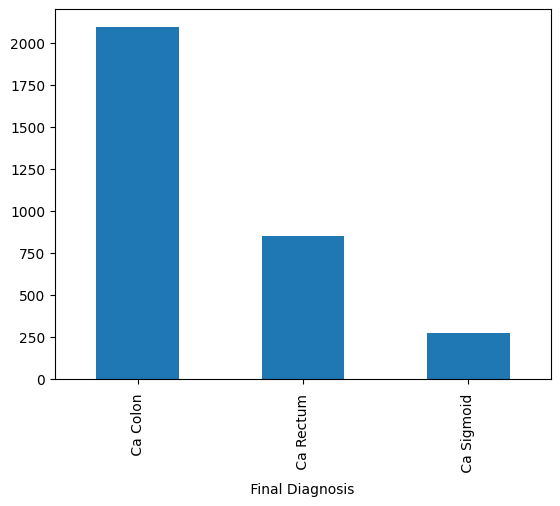

In [324]:
MedicalData[' Final Diagnosis '].value_counts().plot(kind='bar')

<Axes: xlabel='incidence year'>

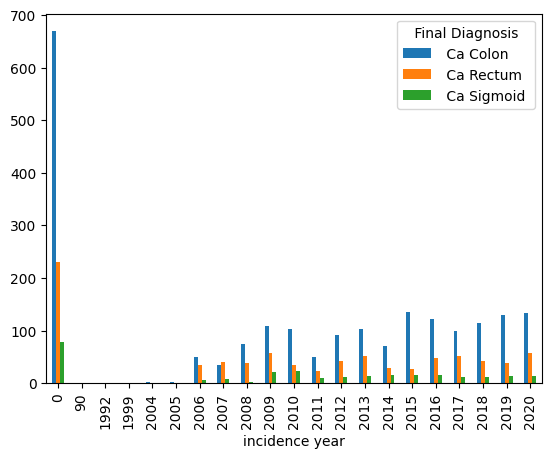

In [327]:
pd.crosstab(MedicalData['incidence year'],MedicalData[' Final Diagnosis ']).plot.bar()

In [335]:
MedicalData.columns

Index(['file No ', 'incidence date ', 'age', 'sex', 'adress', 'primary site ',
       'icd-o-3 ', 'primary histology ', 'Icd-o-3 ', 'behavior ', 'grade',
       'final diagnosis ', 'Data sources', 'Region', 'Area', 'Aunicipality',
       'incidence year', 'age group', 'Sex', 'Final Diagnosis', 'Male',
       'Female', ' Final Diagnosis '],
      dtype='object')

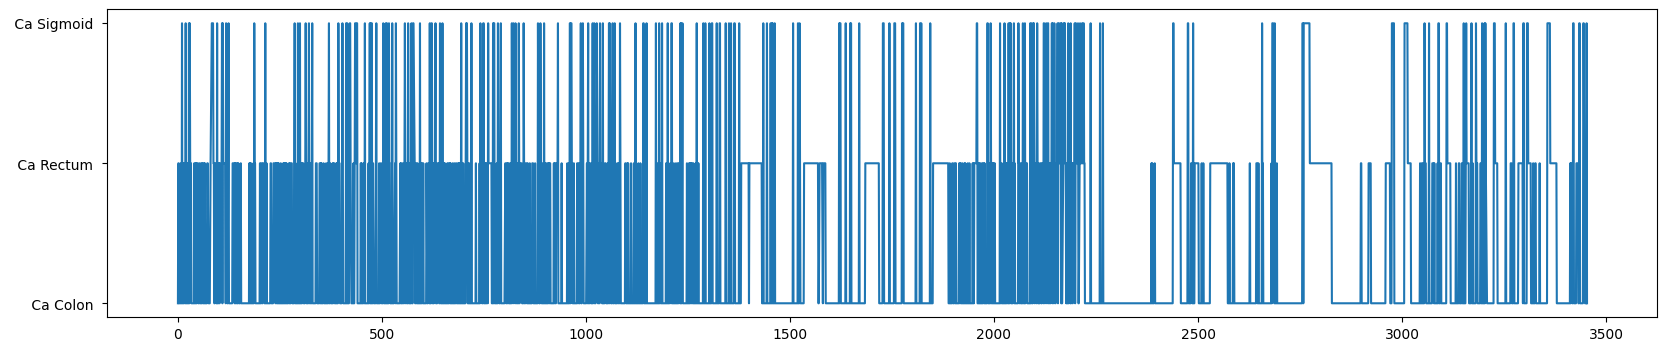

In [350]:
#list = np.arange(0, 3222, 1, dtype=int)
plt.figure(figsize = (20, 4))
#sns.lineplot(x='incidence year', y=list, hue=' Final Diagnosis ', data=MedicalData) 
#plt.plot( MedicalData['incidence year'], MedicalData[' Final Diagnosis '], marker='s', c='indianred', ls='-', lw=0.75, ms=3, mew=1, mec='indianred')

plt.plot(MedicalData[' Final Diagnosis '])

<Axes: xlabel=' Final Diagnosis '>

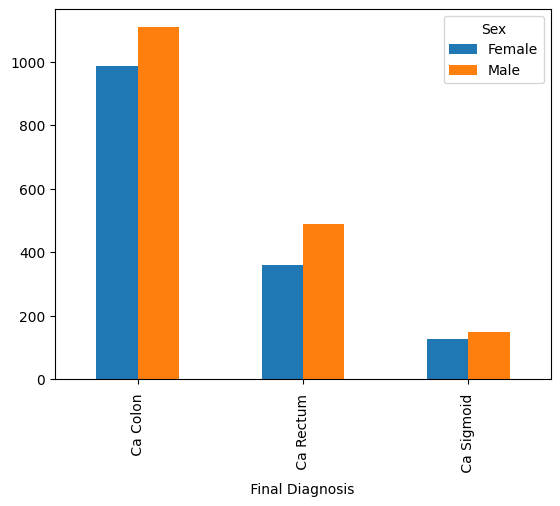

In [326]:
pd.crosstab(MedicalData[' Final Diagnosis '],MedicalData['Sex']).plot.bar()

In [305]:
print(MedicalData['icd-o-3 '].nunique()) # should be 16
print(MedicalData['icd-o-3 '].value_counts())
MedicalData['icd-o-3 '].value_counts().sum()

22
icd-o-3 
C18.9      843
C20.9      532
C18.7      404
C20.9      299
C19.9      246
C18.0      177
C18.2      152
C18.6      106
C18.4       78
C18.7       64
C18.0       64
C18.6       63
C18.5       59
C18.3       52
C19.9       28
C18.2       13
C18.4       11
C18.1       10
C21.8        9
C21.1        5
C21.0        5
C19.9        2
Name: count, dtype: int64


3222

In [299]:
print("Number of unique files found : ", MedicalData['file No '].nunique()) # should be 16
print("Number of all files available is : ", MedicalData['file No '].value_counts().sum())

Number of unique files found :  2137
Number of all files available is :  2167


In [290]:
print(MedicalData['Sex'].nunique()) # should be 2
MedicalData['Sex'].value_counts()

2


Sex
Male      1749
Female    1473
Name: count, dtype: int64

In [287]:
print(MedicalData['primary site '].nunique()) # should be 16
MedicalData['primary site '].value_counts()


58


primary site 
Rectum, NOS                                         714
Colon, NOS                                          570
Caecum, NOS                                         223
Sigmoid colon                                       209
Colon,NOS                                           207
Rectosigmoid colon                                  178
Sigmoid Colon                                       136
Sigmoid colon                                       118
Rectum, NOS                                         117
Descending colon                                    111
Rectosigmoid colon                                   92
Ascending colon                                      86
Transverse colon                                     73
colon, NOS                                           59
Ascending colon                                      51
Splenic flexure                                      43
Hepatic flexure                                      37
descending colon                  

Sex
Male      1749
Female    1473
Name: count, dtype: int64
2


<Axes: xlabel='Sex'>

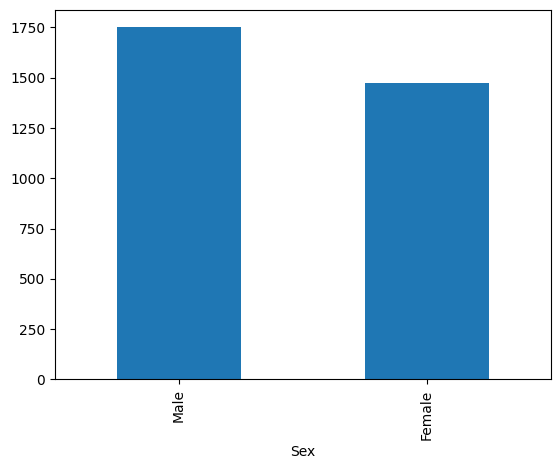

In [201]:
print(MedicalData['Sex'].value_counts())
print(MedicalData['Sex'].nunique()) # should be 2
MedicalData['Sex'].value_counts().plot(kind='bar')

<Axes: xlabel='age group'>

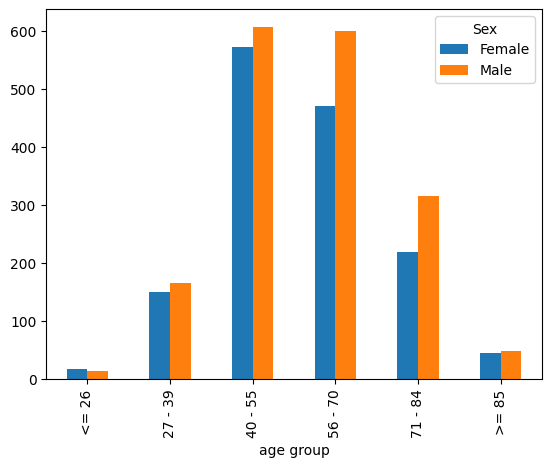

In [203]:
pd.crosstab(MedicalData['age group'],MedicalData['Sex']).plot.bar()

In [185]:
# Printout the MedicalData dataframe.

MedicalData

,file No,incidence date,age,sex,adress,primary site,icd-o-3,primary histology,Icd-o-3,behavior,grade,final diagnosis,Data sources,Region,Area,Aunicipality,incidence year,age group
Index,,,,,,,,,,,,,,,,,,
1,42/06,2006-01-25 00:00:00,64,F,Az Zahra,Transverse colon,C18.4,"adenocarcinoma, NOS",M8140,3,1,Ca Colon,Sabratha,Tripoli,Coast,Ajfarah,2006,56 - 70
2,68/06,2006-04-02 00:00:00,80,F,Al Ajaylat,"Rectum, NOS",C20.9,Intestinal adenocarcinoma,M8144,3,1,Ca Rectum,Sabratha,Tripoli,Coast,Surman,2006,71 - 84
3,81/06,2006-08-02 00:00:00,73,M,Al Ajaylat,"Rectum, NOS",C20.9,Intestinal adenocarcinoma,M8144,3,1,Ca Colon,Sabratha,Tripoli,Coast,Surman,2006,71 - 84
4,90/06,2006-11-02 00:00:00,50,F,Az Zawiyah,Ascending colon,C18.2,Intestinal adenocarcinoma,M8144,3,2,Ca Colon,Sabratha,Tripoli,Coast,Az Zawiyah,2006,40 - 55
5,92/06,2006-12-02 00:00:00,40,F,Sabratah,"Colon, NOS",C18.9,Mucinous adenocarcinoma,M8480,3,3,Ca Colon,Sabratha,Tripoli,Coast,Surman,2006,40 - 55
7,104/06,2006-02-14 00:00:00,56,M,Gharyan,Hepatic flexure,C18.5,Intestinal adenocarcinoma,M8144,3,2,Ca Colon,Sabratha,Tripoli,Mountain,Gharyan,2006,56 - 70
8,167/06,2006-08-03 00:00:00,31,F,Yifran,"Rectum, NOS",C20.9,Colloidal adenocarcinoma,M8480,3,3,Ca Rectum,Sabratha,Tripoli,Mountain,Yifran,2006,27 - 39
9,182/06,2006-11-03 00:00:00,34,M,Az Zawiyah,"Colon, NOS",C18.9,"adenocarcinoma, NOS",M8140,3,2,Ca Colon,Sabratha,Tripoli,Coast,Az Zawiyah,2006,27 - 39
10,183/06,2006-12-03 00:00:00,40,F,Bin Jawwad,"Caecum, NOS",C18.0,Intestinal adenocarcinoma,M8144,3,2,Ca Colon,Sabratha,AL Khaleej,Coast,Sirt,2006,40 - 55
